# Overview

This notebook is to obtain posts in [r/streetphotography](https://old.reddit.com/r/streetphotography/) using PRAW python API from reddit 

## Goal

- Initialize PRAW object
- Obtain posts on r/streetphotography
- Create functions to eaily obtain posts for future notebook

### Import Libraries

In [1]:
import os
from urllib.request import urlopen
import io
import numpy as np
from colorthief import ColorThief

from src.photo_tools import reddit_tools
from src.photo_tools import palette_tools

import webcolors
import matplotlib.pyplot as plt
%matplotlib inline

### Initializing imports

In [2]:
agent_name = "photo_color_analyzer"
reddit = reddit_tools(agent_name)
pl = palette_tools()

In [3]:
df = reddit.get_top_posts("streetphotography", time="all", limit=30)

#### Ensure URL contains image

Some urls may contain a reddit album which requires web scraping to pull values. In the interest of time, I will be only dealing with .jpg extensions

In [4]:
df["is_img"] = df.url.apply(lambda x: 1 if x[-3:] == "jpg" else np.nan)
df.dropna(inplace = True)

In [5]:
df

,title,url,is_img
0,Salaryman pedestrian in Shinjuku,https://i.redd.it/n8icfynpv2v41.jpg,1
1,Food Trailer at 5 AM.,https://i.redd.it/g05ify9ubo851.jpg,1
2,"Get home quickly ☔️ Seoul, South Korea 2020 Mo...",https://i.redd.it/mv24dw5akcf51.jpg,1
3,Morning tea on the street of Delhi,https://i.redd.it/7jiehpzmttk51.jpg,1
4,Spiderman at NYC Protests,https://i.redd.it/jkql2nxgei451.jpg,1
5,Shot from a 28th story balcony in center city ...,https://i.redd.it/tcf9vy8aes351.jpg,1
6,The spice merchant,https://i.redd.it/0hse4xeox8s51.jpg,1
7,Newcastle Upon Tyne,https://i.redd.it/1nhh7bxcaxn51.jpg,1
8,Scanning my grandpa’s 35mm and of all the stre...,https://i.redd.it/zrj7db5atkg51.jpg,1
9,Peaceful Protest.,https://i.redd.it/p67knwkvl5251.jpg,1


In [6]:
title = "San Francisco is a ghost town."
savepath = "images\\" + title + ".png"

to_plot_df = df[df.title == title]
to_plot_df["rgb_palette"] = to_plot_df.url.apply(pl.get_palette)

C:\Users\Yung\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
to_plot_df

,title,url,is_img,rgb_palette
15,San Francisco is a ghost town.,https://i.redd.it/xgc9s0u3wax41.jpg,1,"[(26, 35, 35), (186, 164, 154), (133, 98, 97),..."


In [8]:
color = pl.rgb_hex_list(to_plot_df.rgb_palette.values[0])

In [10]:
savepath

'images\\San Francisco is a ghost town..png'

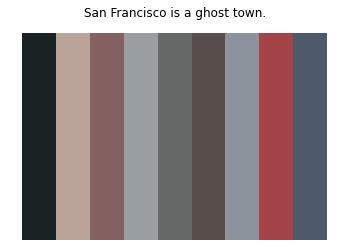

In [9]:
x = range(0, len(color))
y = [1] * len(color)
width = 1

fig, ax = plt.subplots()
ax.bar(x, y, color=color, width=width)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axis("off");
plt.title(title)
plt.savefig(savepath)

In [37]:
# gets all rows
df["rgb_palette"] = df.url.apply(pl.get_palette) #this process can be slow

KeyboardInterrupt: 

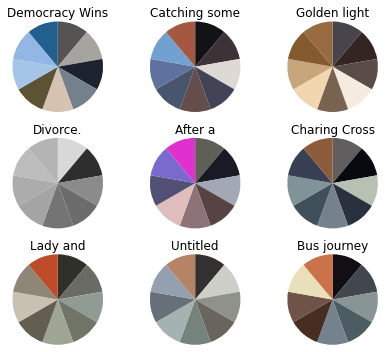

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(6,5))

for i in range(0, df.shape[0]):

    col = i//3
    row = i%3
    plot_df = df.iloc[i,:]
    
    wedges = [1] * len(plot_df.rgb_palette)
    sorted_color = pl.palette_sort(plot_df.rgb_palette)
    color = pl.rgb_hex_list(sorted_color)
    
    ax[row, col].pie(wedges, colors=color, startangle=90, counterclock=False, radius=1.4);
    ax[row, col].set_title(" ".join(plot_df.title.split()[:2]), pad=10)

plt.tight_layout()

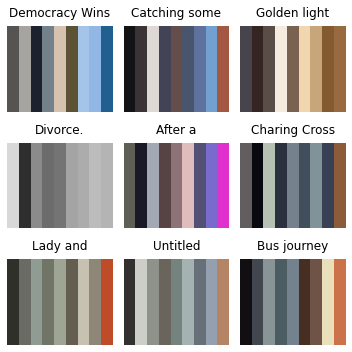

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(5,5))

for i in range(0, df.shape[0]):
    col = i//3
    row = i%3
    plot_df = df.iloc[i,:]
    width = 1
    
    x = range(len(plot_df.rgb_palette))
    y = [width] * len(plot_df.rgb_palette)
    color = pl.rgb_hex_list(plot_df.rgb_palette)
    
    axe = ax[row, col]
    
    axe.bar(x,y, color=color, width=width);
    axe.set_title(" ".join(plot_df.title.split()[:2]), pad=10)
    axe.xaxis.set_visible(False)
    axe.yaxis.set_visible(False)
    axe.set_xlim(-(width/2), (len(x)-(width/2)))
    axe.set_ylim(0,1)
    axe.axis("off")
    axe.margins(0.1, 0.1)

plt.tight_layout()